In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

# Load the dataset
file_path = 'final_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the summary statistics of the dataset
data_head = data.head()
data_description = data.describe(include='all')
data_info = data.info()

data_head, data_description, data_info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 1 columns):
 #   Column                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                           --------------  ----- 
 0   Date;Price;Open;High;Low;Vol.;Change %;GDPC1_PCH;DFF;Price_USD;Change %_USD;UNRATE;INDPRO;T10YIE;Production_Oil  5407 non-null   object
dtypes: object(1)
memory usage: 42.4+ KB


(  Date;Price;Open;High;Low;Vol.;Change %;GDPC1_PCH;DFF;Price_USD;Change %_USD;UNRATE;INDPRO;T10YIE;Production_Oil
 0  2003-01-02;31.85;31.6;32.09;31.4;62.48K;2.08%;...                                                             
 1  2003-01-03;33.08;31.98;33.25;31.9;68.42K;3.86%...                                                             
 2  2003-01-06;32.1;33.08;33.33;31.91;98.25K;-2.96...                                                             
 3  2003-01-07;31.08;32.11;32.4;30.51;124.28K;-3.1...                                                             
 4  2003-01-08;30.56;31.05;31.3;29.75;108.04K;-1.6...                                                             ,
        Date;Price;Open;High;Low;Vol.;Change %;GDPC1_PCH;DFF;Price_USD;Change %_USD;UNRATE;INDPRO;T10YIE;Production_Oil
 count                                                5407                                                             
 unique                                               5407           

In [3]:
# Split the data into separate columns
data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows and summary statistics again
data_head = data.head()
data_description = data.describe(include='all')
data_info = data.info()

data_head, data_description, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5407 non-null   object 
 1   Price           5407 non-null   float64
 2   Open            5407 non-null   float64
 3   High            5407 non-null   float64
 4   Low             5407 non-null   float64
 5   Vol.            5259 non-null   object 
 6   Change %        5407 non-null   object 
 7   GDPC1_PCH       5407 non-null   float64
 8   DFF             5407 non-null   float64
 9   Price_USD       5361 non-null   float64
 10  Change %_USD    5361 non-null   float64
 11  UNRATE          5407 non-null   float64
 12  INDPRO          5407 non-null   float64
 13  T10YIE          5243 non-null   float64
 14  Production_Oil  5407 non-null   float64
dtypes: float64(12), object(3)
memory usage: 633.8+ KB


(         Date  Price   Open   High    Low     Vol. Change %  GDPC1_PCH   DFF  \
 0  2003-01-02  31.85  31.60  32.09  31.40   62.48K    2.08%   -0.30972  1.30   
 1  2003-01-03  33.08  31.98  33.25  31.90   68.42K    3.86%   -0.30972  1.12   
 2  2003-01-06  32.10  33.08  33.33  31.91   98.25K   -2.96%   -0.30972  1.22   
 3  2003-01-07  31.08  32.11  32.40  30.51  124.28K   -3.18%   -0.30972  1.20   
 4  2003-01-08  30.56  31.05  31.30  29.75  108.04K   -1.67%   -0.30972  1.29   
 
    Price_USD  Change %_USD  UNRATE   INDPRO  T10YIE  Production_Oil  
 0     102.98        0.0111     5.8  91.1355    1.64        178412.0  
 1     102.47       -5.0000     5.8  91.1355    1.62        178412.0  
 2     101.97       -0.0049     5.8  91.1355    1.63        178412.0  
 3     102.57        0.0059     5.8  91.1355    1.62        178412.0  
 4     101.87       -0.0068     5.8  91.1355    1.71        178412.0  ,
               Date        Price         Open         High          Low   Vol.  \
 co

In [4]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Removing '%' from 'Change %' and converting to float
data['Change %'] = data['Change %'].str.rstrip('%').astype('float') / 100


# Rename the 'Vol.' column to 'Vol'
data = data.rename(columns={'Vol.': 'Vol'})

In [5]:
# Define a function to convert volume strings to numeric values, handling both 'K' and 'M'
def convert_volume(vol):
    if pd.isna(vol):
        return None  # Return None for missing values
    if 'K' in vol:
        return float(vol.rstrip('K')) * 1000
    elif 'M' in vol:
        return float(vol.rstrip('M')) * 1000000
    return float(vol)

# Apply the conversion function to the 'Vol.' column
data['Vol'] = data['Vol'].apply(convert_volume)

# Check the data types and first few rows again
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            5407 non-null   datetime64[ns]
 1   Price           5407 non-null   float64       
 2   Open            5407 non-null   float64       
 3   High            5407 non-null   float64       
 4   Low             5407 non-null   float64       
 5   Vol             5259 non-null   float64       
 6   Change %        5407 non-null   float64       
 7   GDPC1_PCH       5407 non-null   float64       
 8   DFF             5407 non-null   float64       
 9   Price_USD       5361 non-null   float64       
 10  Change %_USD    5361 non-null   float64       
 11  UNRATE          5407 non-null   float64       
 12  INDPRO          5407 non-null   float64       
 13  T10YIE          5243 non-null   float64       
 14  Production_Oil  5407 non-null   float64       
dtypes: d

(None,
         Date  Price   Open   High    Low       Vol  Change %  GDPC1_PCH   DFF  \
 0 2003-01-02  31.85  31.60  32.09  31.40   62480.0    0.0208   -0.30972  1.30   
 1 2003-01-03  33.08  31.98  33.25  31.90   68420.0    0.0386   -0.30972  1.12   
 2 2003-01-06  32.10  33.08  33.33  31.91   98250.0   -0.0296   -0.30972  1.22   
 3 2003-01-07  31.08  32.11  32.40  30.51  124280.0   -0.0318   -0.30972  1.20   
 4 2003-01-08  30.56  31.05  31.30  29.75  108040.0   -0.0167   -0.30972  1.29   
 
    Price_USD  Change %_USD  UNRATE   INDPRO  T10YIE  Production_Oil  
 0     102.98        0.0111     5.8  91.1355    1.64        178412.0  
 1     102.47       -5.0000     5.8  91.1355    1.62        178412.0  
 2     101.97       -0.0049     5.8  91.1355    1.63        178412.0  
 3     102.57        0.0059     5.8  91.1355    1.62        178412.0  
 4     101.87       -0.0068     5.8  91.1355    1.71        178412.0  )

In [6]:
# Calculate the percentage of missing values for each column
nan_percentages = data.isna().sum() / len(data) * 100
nan_percentages



Date              0.000000
Price             0.000000
Open              0.000000
High              0.000000
Low               0.000000
Vol               2.737193
Change %          0.000000
GDPC1_PCH         0.000000
DFF               0.000000
Price_USD         0.850749
Change %_USD      0.850749
UNRATE            0.000000
INDPRO            0.000000
T10YIE            3.033105
Production_Oil    0.000000
dtype: float64

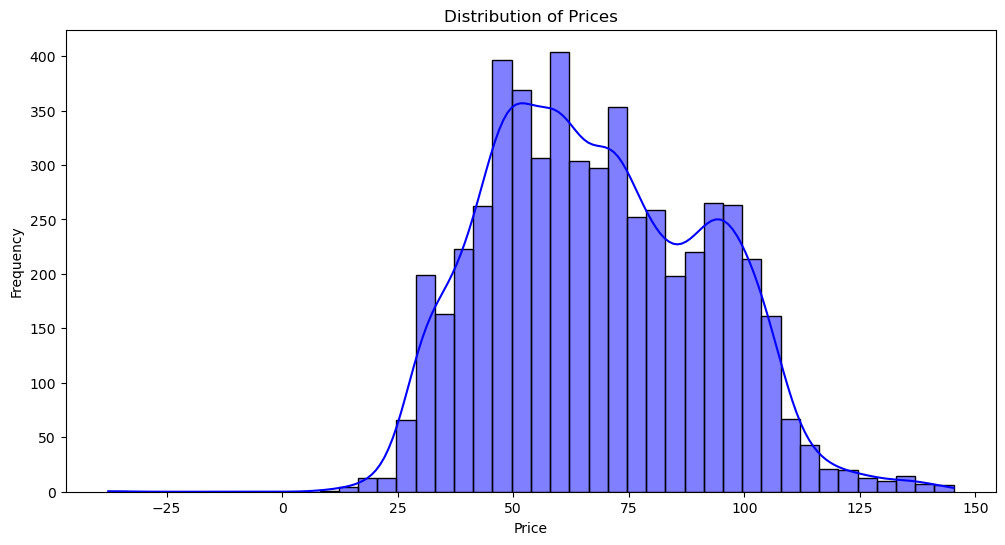

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



In [8]:
# Assuming the negative value is in the 'Price' column
data = data[data['Price'] >= 0]


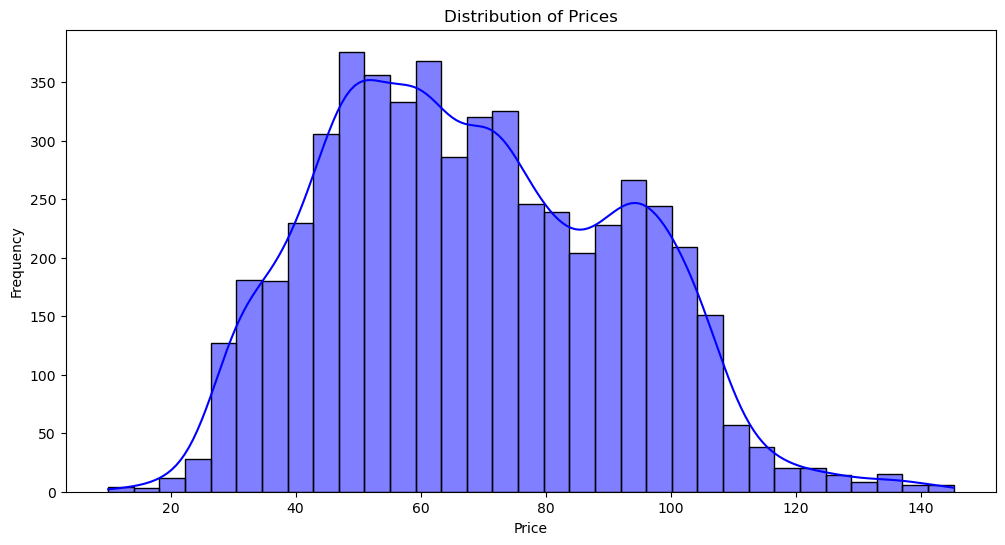

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



In [10]:
import numpy as np
# Function to fill missing values based on described logic
def fill_with_median(df, column):
    for i in df[df[column].isna()].index:
        # Find indices for most recent non-missing values before and after the NaN
        previous_index = df[column].iloc[:i].last_valid_index()
        next_index = df[column].iloc[i+1:].first_valid_index()
        
        if pd.notna(previous_index) and pd.notna(next_index):
            # Compute median of the two values
            median_value = np.median([df.at[previous_index, column], df.at[next_index, column]])
            df.at[i, column] = median_value  # Fill missing value with the median

# Apply the function to each column except 'Time' as it likely doesn't have missing values
for column in data.columns.drop('Date'):
    fill_with_median(data, column)

print(data[:])

           Date  Price   Open   High    Low       Vol  Change %  GDPC1_PCH  \
0    2003-01-02  31.85  31.60  32.09  31.40   62480.0    0.0208   -0.30972   
1    2003-01-03  33.08  31.98  33.25  31.90   68420.0    0.0386   -0.30972   
2    2003-01-06  32.10  33.08  33.33  31.91   98250.0   -0.0296   -0.30972   
3    2003-01-07  31.08  32.11  32.40  30.51  124280.0   -0.0318   -0.30972   
4    2003-01-08  30.56  31.05  31.30  29.75  108040.0   -0.0167   -0.30972   
...         ...    ...    ...    ...    ...       ...       ...        ...   
5402 2023-12-25  73.79  73.49  73.94  73.48  237960.0    0.0031    0.20298   
5403 2023-12-26  75.57  73.56  76.18  73.13  208720.0    0.0241    0.20298   
5404 2023-12-27  74.11  75.32  75.66  73.77  253320.0   -0.0193    0.20298   
5405 2023-12-28  71.77  73.80  74.40  71.72  262750.0   -0.0316    0.20298   
5406 2023-12-29  71.65  71.99  72.62  71.25  214490.0   -0.0017    0.20298   

       DFF  Price_USD  Change %_USD  UNRATE    INDPRO  T10YIE  

In [11]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


Date              0
Price             0
Open              0
High              0
Low               0
Vol               0
Change %          0
GDPC1_PCH         0
DFF               0
Price_USD         0
Change %_USD      0
UNRATE            0
INDPRO            0
T10YIE            0
Production_Oil    0
dtype: int64

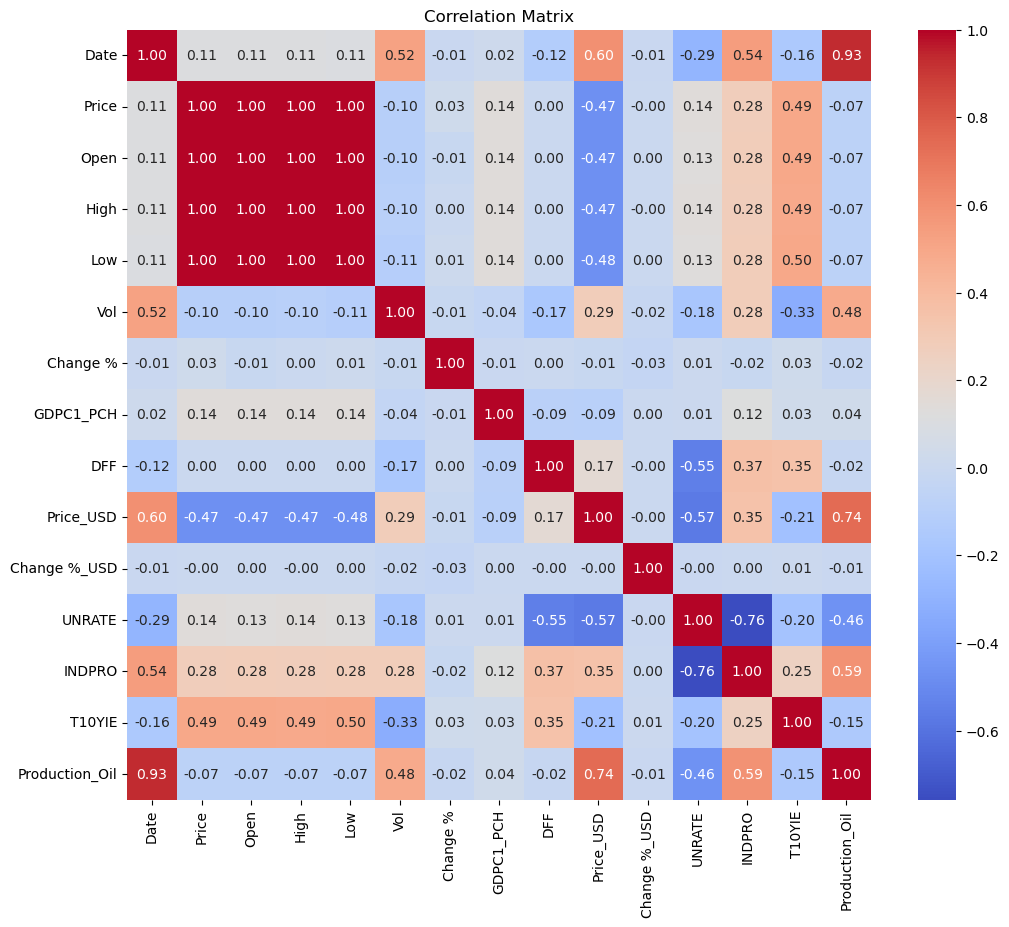

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()



In [13]:
data.head()

,Date,Price,Open,High,Low,Vol,Change %,GDPC1_PCH,DFF,Price_USD,Change %_USD,UNRATE,INDPRO,T10YIE,Production_Oil
0,2003-01-02,31.85,31.60,32.09,31.40,62480.0,0.0208,-0.30972,1.30,102.98,0.0111,5.8,91.1355,1.64,178412.0
1,2003-01-03,33.08,31.98,33.25,31.90,68420.0,0.0386,-0.30972,1.12,102.47,-5.0000,5.8,91.1355,1.62,178412.0
2,2003-01-06,32.10,33.08,33.33,31.91,98250.0,-0.0296,-0.30972,1.22,101.97,-0.0049,5.8,91.1355,1.63,178412.0
3,2003-01-07,31.08,32.11,32.40,30.51,124280.0,-0.0318,-0.30972,1.20,102.57,0.0059,5.8,91.1355,1.62,178412.0
4,2003-01-08,30.56,31.05,31.30,29.75,108040.0,-0.0167,-0.30972,1.29,101.87,-0.0068,5.8,91.1355,1.71,178412.0


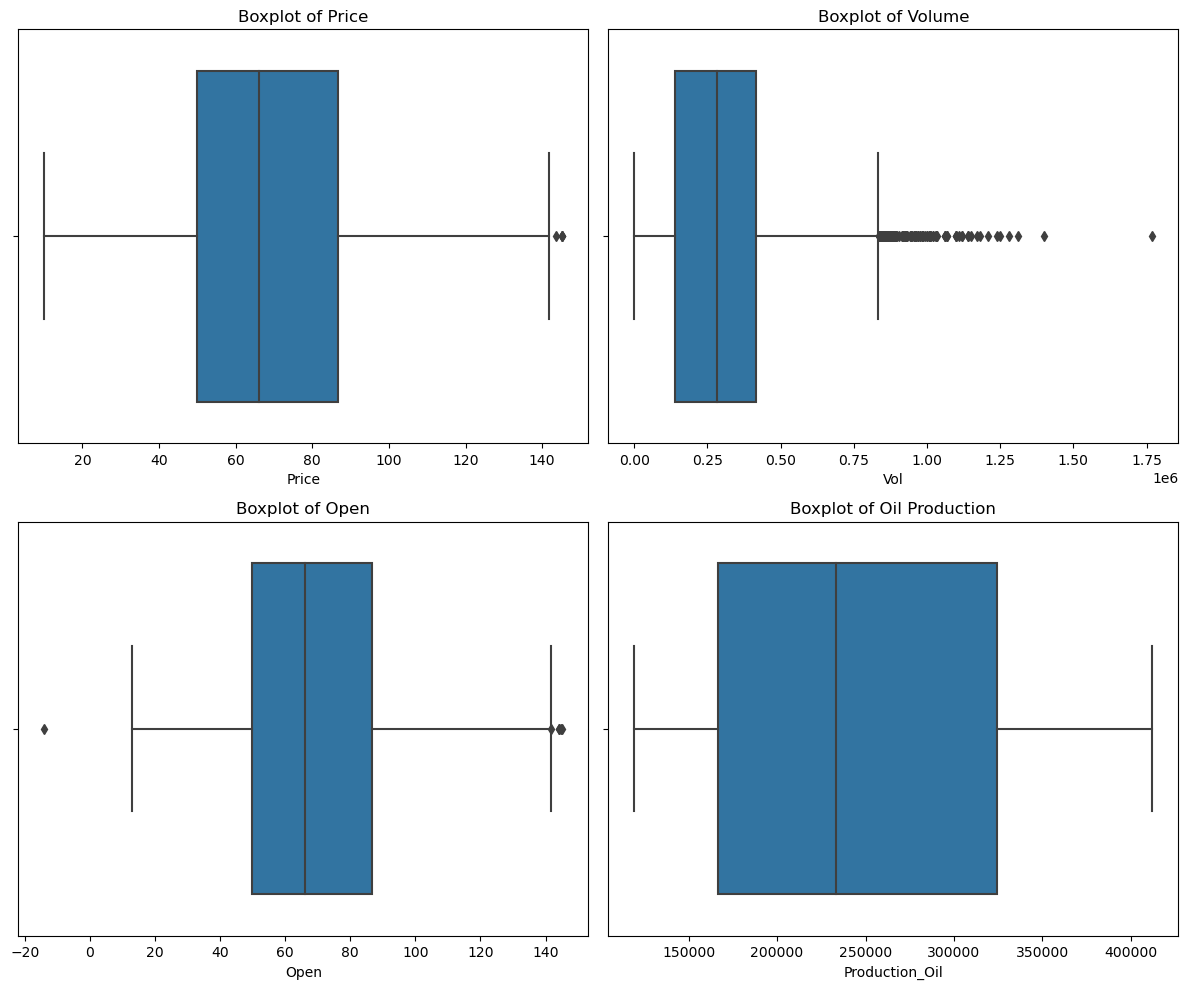

,Price,Vol,Open,High,Low,Production_Oil
count,5406.000000,5.406000e+03,5406.000000,5406.000000,5406.000000,5406.000000
mean,68.261927,3.157299e+05,68.263916,69.305252,67.145631,247109.884018
std,23.306428,2.145347e+05,23.322274,23.543722,23.046925,85631.054894
min,10.010000,2.000000e+01,-14.000000,13.690000,-16.740000,119208.000000
25%,49.880000,1.383225e+05,49.805000,50.780000,49.065000,166810.000000
50%,66.125000,2.818550e+05,66.050000,66.925000,64.995000,233562.000000
75%,86.660000,4.169250e+05,86.567500,87.907500,85.420000,324443.000000
max,145.290000,1.770000e+06,145.190000,147.270000,143.220000,412155.000000


In [14]:
# Descriptive statistics for key columns to check for negative values
descriptive_stats = data[['Price', 'Vol', 'Open', 'High', 'Low', 'Production_Oil']].describe()

# Plotting boxplots for price and volume to visualize outliers
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=data, x='Price', ax=ax[0, 0])
ax[0, 0].set_title('Boxplot of Price')

sns.boxplot(data=data, x='Vol', ax=ax[0, 1])
ax[0, 1].set_title('Boxplot of Volume')

sns.boxplot(data=data, x='Open', ax=ax[1, 0])
ax[1, 0].set_title('Boxplot of Open')

sns.boxplot(data=data, x='Production_Oil', ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of Oil Production')

plt.tight_layout()
plt.show()

descriptive_stats


In [15]:
# Remove 'Open', 'High', 'Low' columns from the dataset
data_cleaned = data.drop(columns=['Open','High', 'Low'])

# Verify the changes
print(data_cleaned.describe())
data_cleaned.head()


                                Date        Price           Vol     Change %  \
count                           5406  5406.000000  5.406000e+03  5406.000000   
mean   2013-08-19 11:49:04.728079872    68.261927  3.157299e+05     0.000370   
min              2003-01-02 00:00:00    10.010000  2.000000e+01    -1.266000   
25%              2008-05-22 06:00:00    49.880000  1.383225e+05    -0.012100   
50%              2013-09-26 12:00:00    66.125000  2.818550e+05     0.001100   
75%              2018-11-18 06:00:00    86.660000  4.169250e+05     0.013100   
max              2023-12-29 00:00:00   145.290000  1.770000e+06     0.376600   
std                              NaN    23.306428  2.145347e+05     0.031337   

         GDPC1_PCH          DFF    Price_USD  Change %_USD       UNRATE  \
count  5406.000000  5406.000000  5406.000000   5406.000000  5406.000000   
mean      4.451677     1.476343    89.383627      0.001024     5.871957   
min      -8.720690     0.040000    71.330000    -18.00

,Date,Price,Vol,Change %,GDPC1_PCH,DFF,Price_USD,Change %_USD,UNRATE,INDPRO,T10YIE,Production_Oil
0,2003-01-02,31.85,62480.0,0.0208,-0.30972,1.30,102.98,0.0111,5.8,91.1355,1.64,178412.0
1,2003-01-03,33.08,68420.0,0.0386,-0.30972,1.12,102.47,-5.0000,5.8,91.1355,1.62,178412.0
2,2003-01-06,32.10,98250.0,-0.0296,-0.30972,1.22,101.97,-0.0049,5.8,91.1355,1.63,178412.0
3,2003-01-07,31.08,124280.0,-0.0318,-0.30972,1.20,102.57,0.0059,5.8,91.1355,1.62,178412.0
4,2003-01-08,30.56,108040.0,-0.0167,-0.30972,1.29,101.87,-0.0068,5.8,91.1355,1.71,178412.0


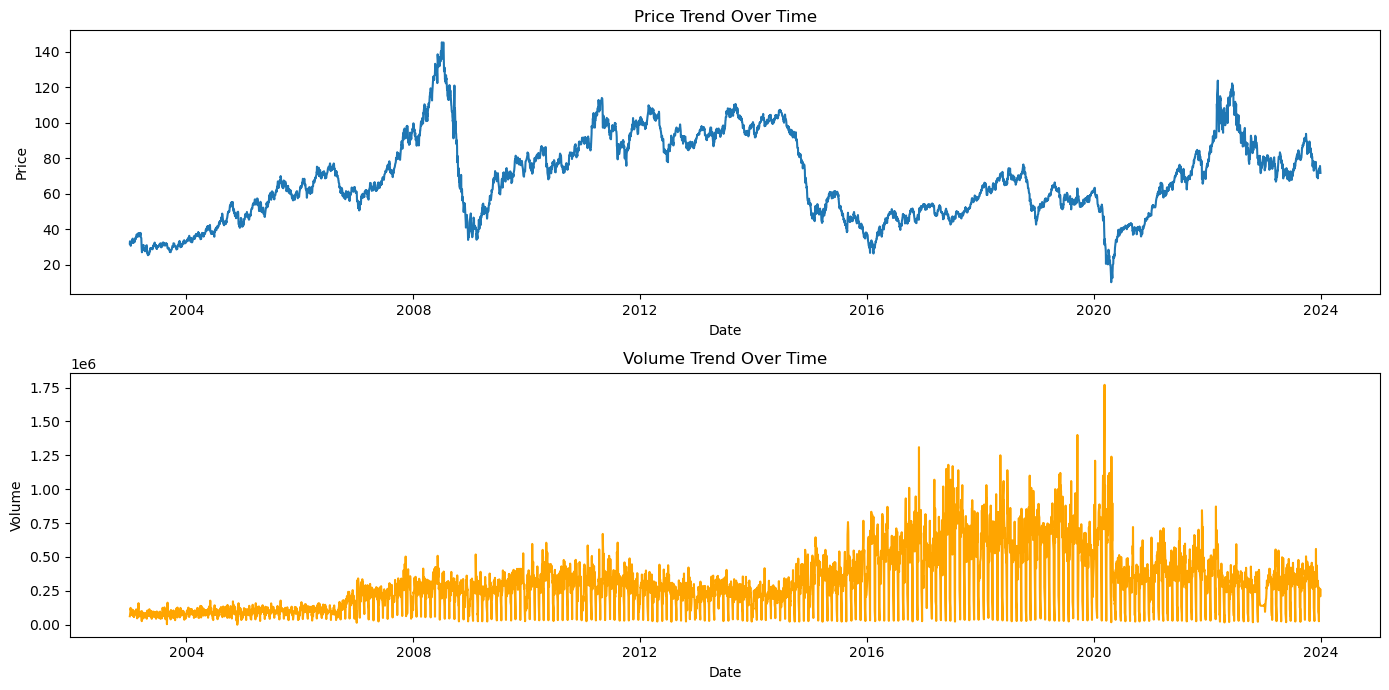

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data_cleaned['Date'], data_cleaned['Price'], label='Price')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

plt.subplot(2, 1, 2)
plt.plot(data_cleaned['Date'], data_cleaned['Vol'], label='Volume', color='orange')
plt.title('Volume Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


In [17]:
# Print details about negative values in each column except the first one
negative_details = {}  # Dictionary to store results

# Detailed check for negative values in each column
for column in data_cleaned.columns[1:]:
    count_neg = (data_cleaned[column] < 0).sum()
    if count_neg > 0:
        negative_details[column] = count_neg

        
# Check if there are any entries in the dictionary and print them
if negative_details:
    print("Columns with negative values and their counts:")
    for col, count in negative_details.items():
        print(f'Column "{col}" has {count} negative values')
else:
    print("No negative values found in the columns checked.")

Columns with negative values and their counts:
Column "Change %" has 2564 negative values
Column "GDPC1_PCH" has 2769 negative values
Column "Change %_USD" has 2634 negative values


In [18]:
# Creating lagged features for Price and Volume
data_cleaned['Volume_Lag1'] = data_cleaned['Vol'].shift(1)
data_cleaned['Price_Lag1'] = data_cleaned['Price'].shift(1)


# Calculating rolling window statistics for Price
window_sizes = [7, 30, 90]  # Weekly, Monthly, Quarterly windows
for window in window_sizes:
    data_cleaned[f'Price_RollingMean_{window}'] = data_cleaned['Price'].rolling(window=window).mean()
    data_cleaned[f'Price_RollingStd_{window}'] = data_cleaned['Price'].rolling(window=window).std()

# Compute rate of change for Price
data_cleaned['Price_RateOfChange'] = data_cleaned['Price'].pct_change()

# Display the new features and their first few rows to confirm creation
data_cleaned[['Date', 'Price', 'Price_Lag1','Volume_Lag1', 'Price_RateOfChange'] + 
           [col for col in data_cleaned.columns if 'Rolling' in col]].head(10)


,Date,Price,Price_Lag1,Volume_Lag1,Price_RateOfChange,Price_RollingMean_7,Price_RollingStd_7,Price_RollingMean_30,Price_RollingStd_30,Price_RollingMean_90,Price_RollingStd_90
0,2003-01-02,31.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-03,33.08,31.85,62480.0,0.038619,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-06,32.10,33.08,68420.0,-0.029625,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-07,31.08,32.10,98250.0,-0.031776,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-08,30.56,31.08,124280.0,-0.016731,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-01-09,31.99,30.56,108040.0,0.046793,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-01-10,31.68,31.99,111720.0,-0.009691,31.762857,0.798722,NaN,NaN,NaN,NaN
7,2003-01-13,32.26,31.68,98560.0,0.018308,31.821429,0.820903,NaN,NaN,NaN,NaN
8,2003-01-14,32.37,32.26,90730.0,0.003410,31.720000,0.669353,NaN,NaN,NaN,NaN
9,2003-01-15,33.21,32.37,114000.0,0.025950,31.878571,0.874441,NaN,NaN,NaN,NaN


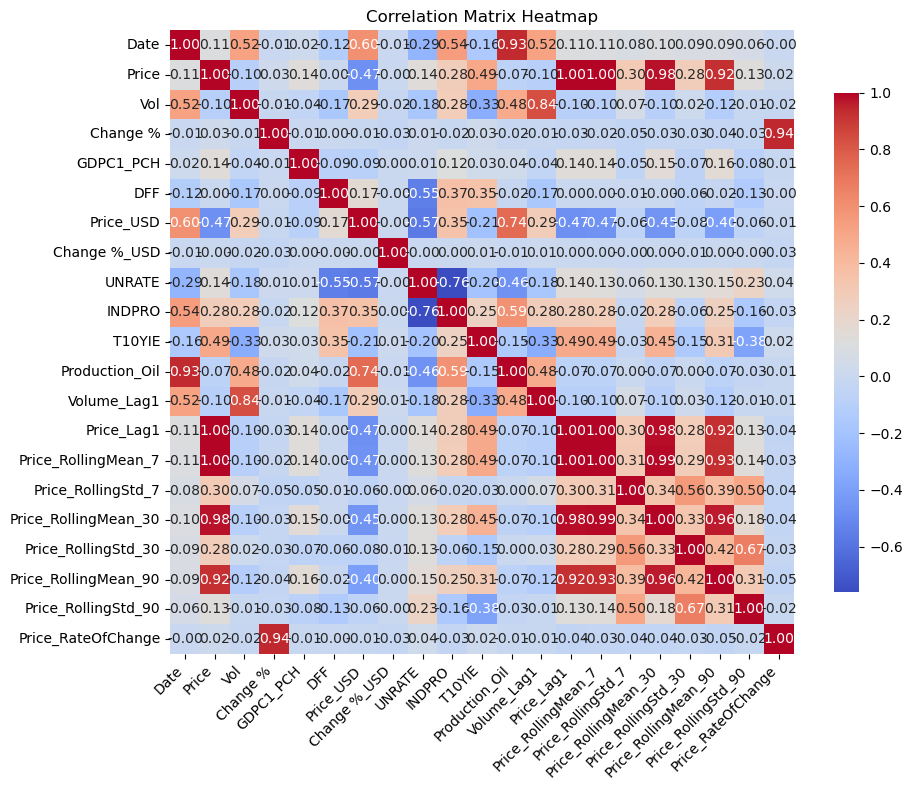

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_cleaned is your DataFrame
# Calculate the correlation matrix
corr_matrix = data_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'shrink': .8}, square=True)

# Adding labels
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import time


import pandas as pd


# Normalize multiple features
features = ['Vol','Change %','GDPC1_PCH','DFF','Price_USD','Change %_USD','UNRATE','INDPRO','T10YIE','Production_Oil','Price_Lag1','Volume_Lag1','Price_RateOfChange','Price_RollingMean_7','Price_RollingStd_7','Price_RollingMean_30','Price_RollingStd_30','Price_RollingMean_90','Price_RollingStd_90']  
target = 'Price'  # Replace with your target variable
feature_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler = MinMaxScaler(feature_range=(0, 1))

data_cleaned[features] = feature_scaler.fit_transform(data_cleaned[features])
data_cleaned[target] = target_scaler.fit_transform(data_cleaned[[target]])

data_cleaned = data_cleaned.set_index('Date')  # Set 'Date' as the index

# Skip the first 90 days in the dataset
start_index = 90 
data_filtered = data_cleaned[start_index:]

# Find the last date in your dataset
last_date = data_filtered.index.max()

# Calculate the start of the last month from the last date
last_month_start = last_date - pd.DateOffset(months=1)

train_data = data_filtered[data_filtered.index < last_month_start]
test_data = data_filtered[data_filtered.index >= last_month_start]

# Split data into features and target for training and testing sets
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]



In [22]:
train_data

,Price,Vol,Change %,GDPC1_PCH,DFF,Price_USD,Change %_USD,UNRATE,INDPRO,T10YIE,Production_Oil,Volume_Lag1,Price_Lag1,Price_RollingMean_7,Price_RollingStd_7,Price_RollingMean_30,Price_RollingStd_30,Price_RollingMean_90,Price_RollingStd_90,Price_RateOfChange
Date,,,,,,,,,,,,,,,,,,,,
2003-05-13,0.136679,0.046611,0.796299,0.024130,0.221601,0.546751,0.529465,0.236842,0.297610,0.553691,0.19239,0.051927,0.128179,0.102480,0.075189,0.063817,0.063497,0.025517,0.101071,0.596279
2003-05-14,0.141632,0.054809,0.785036,0.024130,0.234637,0.543478,0.529368,0.236842,0.297610,0.543624,0.19239,0.046611,0.136679,0.105479,0.101835,0.063644,0.062019,0.025072,0.101369,0.573909
2003-05-15,0.138454,0.047549,0.761780,0.024130,0.245810,0.558439,0.529612,0.236842,0.297610,0.546980,0.19239,0.054809,0.141632,0.108858,0.085382,0.063695,0.062255,0.024690,0.101888,0.527754
2003-05-16,0.141410,0.032492,0.779192,0.024130,0.227188,0.531791,0.176471,0.236842,0.297610,0.530201,0.19239,0.047549,0.138454,0.112114,0.068386,0.063743,0.062570,0.024469,0.102250,0.562336
2003-05-19,0.139119,0.041707,0.764276,0.024130,0.227188,0.524778,0.529318,0.236842,0.297610,0.526846,0.19239,0.032492,0.141410,0.114185,0.050504,0.063803,0.062862,0.024272,0.102652,0.532705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.495934,0.219952,0.765494,0.023942,0.985102,0.761805,0.529512,0.026316,0.939555,0.744966,0.95461,0.134809,0.500887,0.490992,0.161622,0.522263,0.253173,0.554698,0.134714,0.535146
2023-11-23,0.490316,0.191768,0.764702,0.023942,0.985102,0.758298,0.529368,0.026316,0.939555,0.736577,0.95461,0.219952,0.495934,0.488843,0.145972,0.520392,0.258158,0.554615,0.135189,0.533647
2023-11-24,0.484403,0.158832,0.764337,0.023942,0.985102,0.749649,0.529309,0.026316,0.939555,0.744966,0.95461,0.191768,0.490316,0.487590,0.147590,0.516932,0.254473,0.554250,0.137116,0.532897


In [23]:
X_train

,Vol,Change %,GDPC1_PCH,DFF,Price_USD,Change %_USD,UNRATE,INDPRO,T10YIE,Production_Oil,Price_Lag1,Volume_Lag1,Price_RateOfChange,Price_RollingMean_7,Price_RollingStd_7,Price_RollingMean_30,Price_RollingStd_30,Price_RollingMean_90,Price_RollingStd_90
Date,,,,,,,,,,,,,,,,,,,
2003-05-13,0.046611,0.796299,0.024130,0.221601,0.546751,0.529465,0.236842,0.297610,0.553691,0.19239,0.128179,0.051927,0.596279,0.102480,0.075189,0.063817,0.063497,0.025517,0.101071
2003-05-14,0.054809,0.785036,0.024130,0.234637,0.543478,0.529368,0.236842,0.297610,0.543624,0.19239,0.136679,0.046611,0.573909,0.105479,0.101835,0.063644,0.062019,0.025072,0.101369
2003-05-15,0.047549,0.761780,0.024130,0.245810,0.558439,0.529612,0.236842,0.297610,0.546980,0.19239,0.141632,0.054809,0.527754,0.108858,0.085382,0.063695,0.062255,0.024690,0.101888
2003-05-16,0.032492,0.779192,0.024130,0.227188,0.531791,0.176471,0.236842,0.297610,0.530201,0.19239,0.138454,0.047549,0.562336,0.112114,0.068386,0.063743,0.062570,0.024469,0.102250
2003-05-19,0.041707,0.764276,0.024130,0.227188,0.524778,0.529318,0.236842,0.297610,0.526846,0.19239,0.141410,0.032492,0.532705,0.114185,0.050504,0.063803,0.062862,0.024272,0.102652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.219952,0.765494,0.023942,0.985102,0.761805,0.529512,0.026316,0.939555,0.744966,0.95461,0.500887,0.134809,0.535146,0.490992,0.161622,0.522263,0.253173,0.554698,0.134714
2023-11-23,0.191768,0.764702,0.023942,0.985102,0.758298,0.529368,0.026316,0.939555,0.736577,0.95461,0.495934,0.219952,0.533647,0.488843,0.145972,0.520392,0.258158,0.554615,0.135189
2023-11-24,0.158832,0.764337,0.023942,0.985102,0.749649,0.529309,0.026316,0.939555,0.744966,0.95461,0.490316,0.191768,0.532897,0.487590,0.147590,0.516932,0.254473,0.554250,0.137116


In [24]:
test_data

,Price,Vol,Change %,GDPC1_PCH,DFF,Price_USD,Change %_USD,UNRATE,INDPRO,T10YIE,Production_Oil,Volume_Lag1,Price_Lag1,Price_RollingMean_7,Price_RollingStd_7,Price_RollingMean_30,Price_RollingStd_30,Price_RollingMean_90,Price_RollingStd_90,Price_RateOfChange
Date,,,,,,,,,,,,,,,,,,,,
2023-11-29,0.501552,0.182008,0.782296,0.023942,0.985102,0.734689,0.529418,0.026316,0.939555,0.728188,0.95461,0.161923,0.490834,0.490656,0.091984,0.507674,0.230223,0.553184,0.142064,0.568440
2023-11-30,0.487507,0.315908,0.755875,0.023942,0.985102,0.751987,0.529621,0.026316,0.939555,0.734899,0.95461,0.182008,0.501552,0.488631,0.079274,0.503855,0.207411,0.552658,0.144202,0.516096
2023-12-01,0.473536,0.202805,0.755570,0.023942,0.985102,0.746611,0.529347,0.026316,0.922993,0.731544,1.00000,0.315908,0.487507,0.485240,0.102086,0.499674,0.186779,0.551779,0.147913,0.515518
2023-12-04,0.465923,0.219669,0.762267,0.023942,0.985102,0.756896,0.529538,0.026316,0.922993,0.728188,1.00000,0.202805,0.473536,0.481547,0.139167,0.496128,0.181146,0.550831,0.152305,0.528762
2023-12-05,0.460600,0.202646,0.764702,0.023942,0.985102,0.764843,0.529509,0.026316,0.922993,0.714765,1.00000,0.219669,0.465923,0.477944,0.176745,0.492876,0.181844,0.550015,0.156761,0.533647
2023-12-06,0.438868,0.246771,0.745952,0.023942,0.985102,0.767181,0.558824,0.026316,0.922993,0.704698,1.00000,0.202646,0.460600,0.471812,0.268873,0.488317,0.184663,0.548630,0.164447,0.496488
2023-12-07,0.438572,0.191516,0.770364,0.023942,0.985102,0.752922,0.529238,0.026316,0.922993,0.714765,1.00000,0.246771,0.438868,0.463900,0.299031,0.484367,0.192147,0.547096,0.171833,0.544846
2023-12-08,0.452543,0.170753,0.787349,0.023942,0.985102,0.763908,0.529544,0.026316,0.922993,0.728188,1.00000,0.191516,0.438572,0.456481,0.224394,0.480292,0.177464,0.545877,0.176994,0.578432
2023-12-11,0.453208,0.155024,0.771521,0.023942,0.985102,0.766012,0.529435,0.026316,0.922993,0.721477,1.00000,0.170753,0.452543,0.451289,0.158514,0.477162,0.173734,0.544557,0.181869,0.547067


### RANDOMFOREST

In [25]:
# Define the Random Forest model
model = RandomForestRegressor()

# Define the grid search parameters
param_grid = {
    'n_estimators': [50, 100, 150,200,300],
    'max_depth': [None, 10, 20,30,50],
    'min_samples_split': [2, 5, 10]
}
# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 300],  # Increased the range of n_estimators
#     'max_depth': [None, 10, 20, 30, 50],       # Added more options for max_depth
#     'min_samples_split': [2, 5, 10, 15],       # Added an additional value
#     'min_samples_leaf': [1, 2, 4, 6],          # New parameter: minimum number of samples required at each leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # New parameter: number of features to consider when looking for the best split
#     'bootstrap': [True, False],                # New parameter: whether bootstrap samples are used when building trees
#     'max_leaf_nodes': [None, 10, 50, 100, 200] # New parameter: maximum number of leaf nodes
# } 

# Start the grid search timer
start_time = time.time()

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_result = grid.fit(X_train, y_train)

#Calculate elapsed time
rf_elapsed_time = time.time() - start_time

# Output best parameters from grid search
print("Best Parameters:", grid_result.best_params_)
print("Grid Search Elapsed Time: {:.2f} seconds".format(rf_elapsed_time))

# Predict with the best model
best_rf_model = grid.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

# Inverse transform predictions and actual values
rf_predictions = target_scaler.inverse_transform(rf_predictions.reshape(-1, 1))
actual = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Calculate evaluation metrics
rf_mse = mean_squared_error(actual, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(actual, rf_predictions)

# Output metrics
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R^2 Score:", rf_r2)

Best Parameters: {'max_depth': 50, 'min_samples_split': 5, 'n_estimators': 100}
Grid Search Elapsed Time: 1824.17 seconds
Mean Squared Error: 0.030077014809935573
Root Mean Squared Error: 0.17342726086153692
R^2 Score: 0.9939353091001745


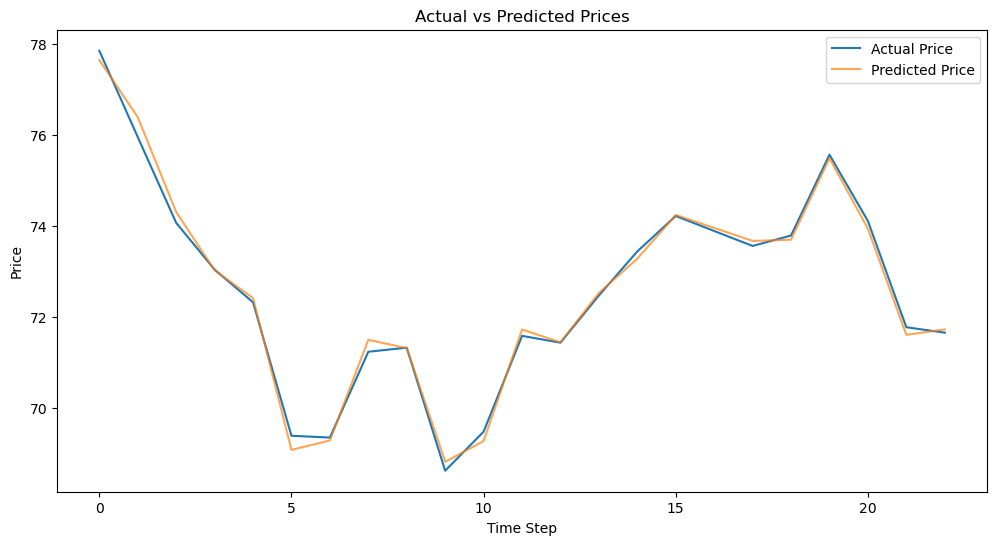

In [26]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(rf_predictions, label='Predicted Price', alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
# Define the trend for actual prices
actual_trend = ['Flat' if actual[i] == actual[i-1] else 'Up' if actual[i] > actual[i-1] else 'Down' for i in range(1, len(actual))]
actual_trend.insert(0, 'Flat')

# Define the trend for predicted prices
predicted_trend = ['Flat' if rf_predictions[i] == rf_predictions[i-1] else 'Up' if rf_predictions[i] > rf_predictions[i-1] else 'Down' for i in range(1, len(rf_predictions))]
predicted_trend.insert(0, 'Flat')

# Create the DataFrame for price comparison
price_comparison_df = pd.DataFrame({
    'Actual Price': actual.flatten(),
    'Predicted Price': rf_predictions.flatten(),
    'Actual Trend': actual_trend,
    'Predicted Trend': predicted_trend
})

# Calculate the accuracy of trend prediction
correct_trends = sum(1 for actual, predicted in zip(actual_trend, predicted_trend) if actual == predicted)
total_trends = len(actual_trend)
rf_accuracy = correct_trends / total_trends

# Display the DataFrame
print(price_comparison_df)
print(f'Accuracy of correctly predicting the trend: {rf_accuracy:.2%}')

    Actual Price  Predicted Price Actual Trend Predicted Trend
0          77.86        77.652925         Flat            Flat
1          75.96        76.396907         Down            Down
2          74.07        74.307607         Down            Down
3          73.04        73.022559         Down            Down
4          72.32        72.412205         Down            Down
5          69.38        69.068775         Down            Down
6          69.34        69.276593         Down              Up
7          71.23        71.492428           Up              Up
8          71.32        71.310489           Up            Down
9          68.61        68.806471         Down            Down
10         69.47        69.264122           Up              Up
11         71.58        71.720620           Up              Up
12         71.43        71.438814         Down            Down
13         72.47        72.525711           Up              Up
14         73.44        73.281500           Up         

### GRADIENT BOOSTING

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_param_grid = {
    'n_estimators': [50, 100, 150,200,250],
    'learning_rate': [0.01, 0.1,0.2, 0.5],
    'max_depth': [3, 5, 7,10]
}
# gb_param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250],      # Expanded range of n_estimators
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],  # More granular options for learning rate
#     'max_depth': [3, 5, 7, 9, 11],                 # Added more options for max_depth
#     'subsample': [0.5, 0.7, 0.9, 1.0],             # New parameter: fraction of samples used for fitting the individual base learners
#     'min_samples_split': [2, 5, 10, 20],           # New parameter: minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4, 6],              # New parameter: minimum number of samples required to be at a leaf node
#     'max_features': ['sqrt', 'log2', None],        # New parameter: the number of features to consider when looking for the best split
# }

# Start the grid search timer
start_time = time.time()

gb_grid = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_result = gb_grid.fit(X_train, y_train)

#Calculate elapsed time
gb_elapsed_time = time.time() - start_time

# Output best parameters from grid search
print("Gradient Boosting - Best Parameters:", gb_grid_result.best_params_)
print("Grid Search Elapsed Time: {:.2f} seconds".format(gb_elapsed_time))


# Predict with the best Gradient Boosting model
best_gb_model = gb_grid.best_estimator_
gb_predictions = best_gb_model.predict(X_test)

# Inverse transform predictions and actual values for Gradient Boosting
gb_predictions = target_scaler.inverse_transform(gb_predictions.reshape(-1, 1))
actual = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Calculate evaluation metrics for Gradient Boosting
gb_mse = mean_squared_error(actual, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(actual, gb_predictions)

# Output metrics for Gradient Boosting
print("Gradient Boosting - Mean Squared Error:", gb_mse)
print("Gradient Boosting - Root Mean Squared Error:", gb_rmse)
print("Gradient Boosting - R^2 Score:", gb_r2)


Gradient Boosting - Best Parameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}
Grid Search Elapsed Time: 3431.14 seconds
Gradient Boosting - Mean Squared Error: 0.10521046582511237
Gradient Boosting - Root Mean Squared Error: 0.3243616281638634
Gradient Boosting - R^2 Score: 0.9787854958782283


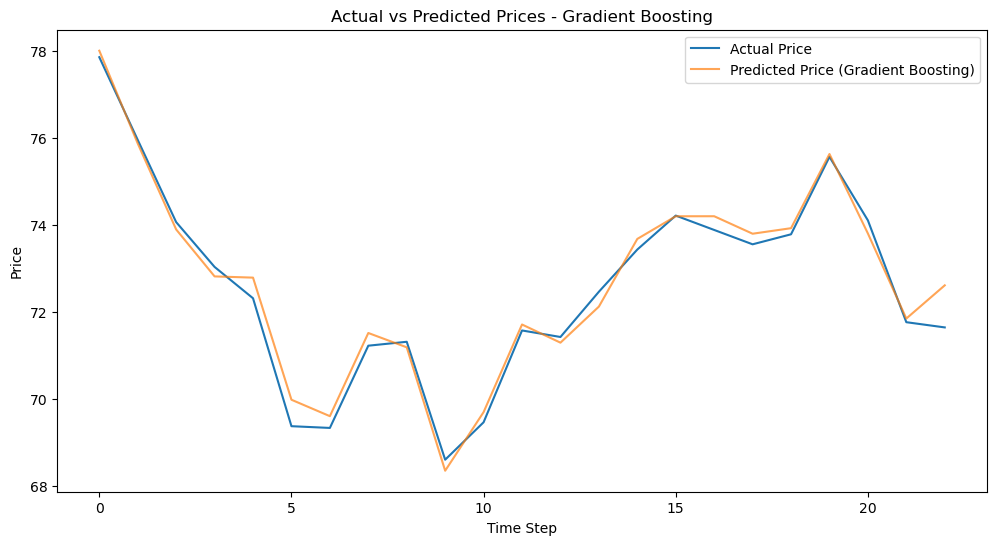

In [30]:
# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(gb_predictions, label='Predicted Price (Gradient Boosting)', alpha=0.7)
plt.title('Actual vs Predicted Prices - Gradient Boosting')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
# Define the trend for actual prices
actual_trend_gb = ['Flat' if actual[i] == actual[i-1] else 'Up' if actual[i] > actual[i-1] else 'Down' for i in range(1, len(actual))]
actual_trend_gb.insert(0, 'Flat')

# Define the trend for predicted prices
predicted_trend_gb = ['Flat' if gb_predictions[i] == gb_predictions[i-1] else 'Up' if gb_predictions[i] > gb_predictions[i-1] else 'Down' for i in range(1, len(gb_predictions))]
predicted_trend_gb.insert(0, 'Flat')

# Create the DataFrame for price comparison
price_comparison_df_gb = pd.DataFrame({
    'Actual Price': actual.flatten(),
    'Predicted Price': gb_predictions.flatten(),
    'Actual Trend': actual_trend_gb,
    'Predicted Trend': predicted_trend_gb
})

# Calculate the accuracy of trend prediction
correct_trends_gb = sum(1 for actual, predicted in zip(actual_trend_gb, predicted_trend_gb) if actual == predicted)
total_trends_gb = len(actual_trend_gb)
gb_accuracy = correct_trends_gb / total_trends_gb

# Display the DataFrame
print(price_comparison_df_gb)
print(f'Accuracy of correctly predicting the trend for Gradient Boosting: {gb_accuracy:.2%}')

    Actual Price  Predicted Price Actual Trend Predicted Trend
0          77.86        78.008903         Flat            Flat
1          75.96        75.877168         Down            Down
2          74.07        73.901305         Down            Down
3          73.04        72.822460         Down            Down
4          72.32        72.794054         Down            Down
5          69.38        69.988009         Down            Down
6          69.34        69.610422         Down            Down
7          71.23        71.521885           Up              Up
8          71.32        71.192767           Up            Down
9          68.61        68.356652         Down            Down
10         69.47        69.703311           Up              Up
11         71.58        71.717169           Up              Up
12         71.43        71.299521         Down            Down
13         72.47        72.128581           Up              Up
14         73.44        73.683797           Up         

### XGBOOSTING

In [32]:
##### XGBoost
xgb_model = xgb.XGBRegressor()

xgb_param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1,0.2, 0.5],
    'max_depth': [3, 5, 7,10]
}

# Start the grid search timer
start_time = time.time()

xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=5)
xgb_grid_result = xgb_grid.fit(X_train, y_train)

#Calculate elapsed time
xgb_elapsed_time = time.time() - start_time

# Output best parameters from grid search
print("XGBoost - Best Parameters:", xgb_grid_result.best_params_)
print("Grid Search Elapsed Time: {:.2f} seconds".format(xgb_elapsed_time))

# Predict with the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_
xgb_predictions = best_xgb_model.predict(X_test)

# Inverse transform predictions for XGBoost
xgb_predictions = target_scaler.inverse_transform(xgb_predictions.reshape(-1, 1))

# Calculate evaluation metrics for XGBoost
xgb_mse = mean_squared_error(actual, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(actual, xgb_predictions)

# Output metrics for XGBoost
print("XGBoost - Mean Squared Error:", xgb_mse)
print("XGBoost - Root Mean Squared Error:", xgb_rmse)
print("XGBoost - R^2 Score:", xgb_r2)

XGBoost - Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Grid Search Elapsed Time: 60.12 seconds
XGBoost - Mean Squared Error: 0.1302556345376016
XGBoost - Root Mean Squared Error: 0.36090945476338193
XGBoost - R^2 Score: 0.9737354200068339


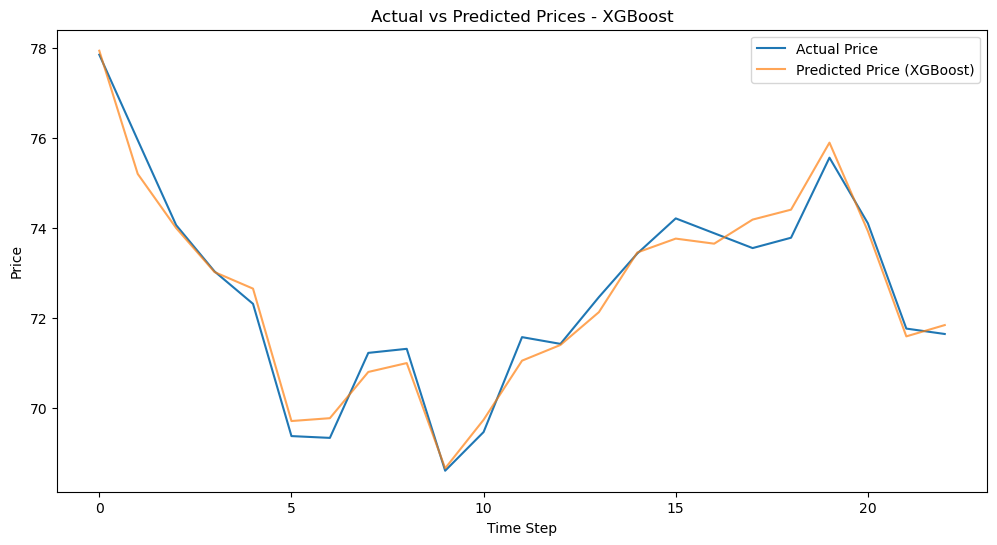

In [33]:
# Plot actual vs predicted for XGBoost
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(xgb_predictions, label='Predicted Price (XGBoost)', alpha=0.7)
plt.title('Actual vs Predicted Prices - XGBoost')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()


In [34]:
# Define the trend for predicted prices
predicted_trend_xgb = ['Flat' if xgb_predictions[i] == xgb_predictions[i-1] else 'Up' if xgb_predictions[i] > xgb_predictions[i-1] else 'Down' for i in range(1, len(xgb_predictions))]
predicted_trend_xgb.insert(0, 'Flat')

# Create the DataFrame for price comparison
price_comparison_df_xgb = pd.DataFrame({
    'Actual Price': actual.flatten(),
    'Predicted Price': xgb_predictions.flatten(),
    'Actual Trend': actual_trend_gb,
    'Predicted Trend': predicted_trend_xgb
})

# Calculate the accuracy of trend prediction
correct_trends_xgb = sum(1 for actual, predicted in zip(actual_trend_gb, predicted_trend_xgb) if actual == predicted)
total_trends_xgb = len(actual_trend_gb)
xgb_accuracy = correct_trends_xgb / total_trends_xgb

# Display the DataFrame
print(price_comparison_df_xgb)
print(f'Accuracy of correctly predicting the trend for XGBoost: {xgb_accuracy:.2%}')

    Actual Price  Predicted Price Actual Trend Predicted Trend
0          77.86        77.947792         Flat            Flat
1          75.96        75.209335         Down            Down
2          74.07        74.005341         Down            Down
3          73.04        73.025772         Down            Down
4          72.32        72.658279         Down            Down
5          69.38        69.714790         Down            Down
6          69.34        69.778061         Down              Up
7          71.23        70.805969           Up              Up
8          71.32        71.003296           Up              Up
9          68.61        68.663574         Down            Down
10         69.47        69.742401           Up              Up
11         71.58        71.056801           Up              Up
12         71.43        71.406166         Down              Up
13         72.47        72.135368           Up              Up
14         73.44        73.462494           Up         

### LINEAR

In [35]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Start timing
start_time = time.time()

# Train the Linear Regression model
lr_model.fit(X_train, y_train)

# End timing for training
training_time = time.time() - start_time

# Predict with the Linear Regression model
lr_predictions = lr_model.predict(X_test)

# Inverse transform predictions for Linear Regression, if required
lr_predictions = target_scaler.inverse_transform(lr_predictions.reshape(-1, 1))

# Calculate evaluation metrics for Linear Regression
lr_mse = mean_squared_error(actual, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(actual, lr_predictions)

# Output metrics for Linear Regression
print("Linear Regression - Mean Squared Error:", lr_mse)
print("Linear Regression - Root Mean Squared Error:", lr_rmse)
print("Linear Regression - R^2 Score:", lr_r2)
print("Training Time (Linear Regression):", training_time, "seconds")

Linear Regression - Mean Squared Error: 0.1342515887981157
Linear Regression - Root Mean Squared Error: 0.36640358731611194
Linear Regression - R^2 Score: 0.9729296808870109
Training Time (Linear Regression): 0.010608911514282227 seconds


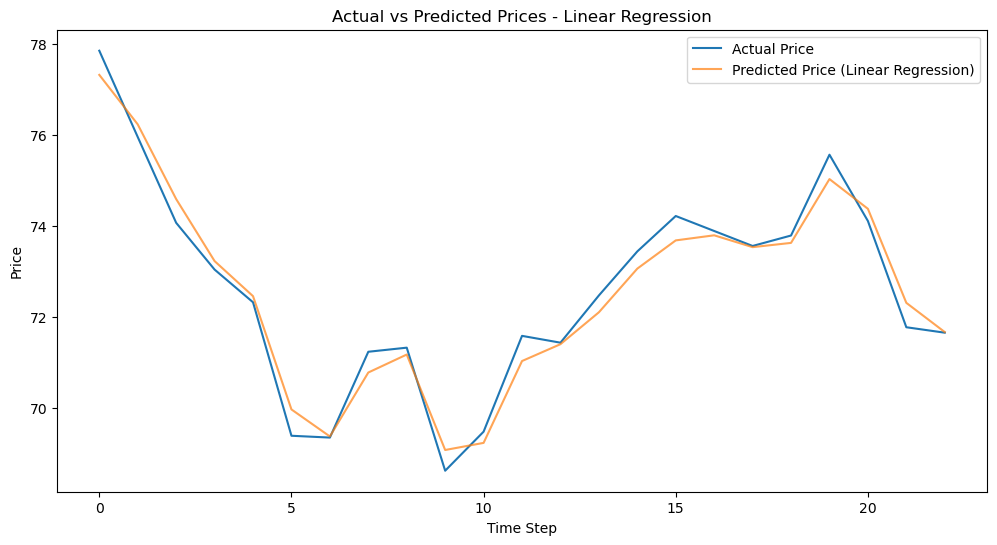

In [36]:
# Plot actual vs predicted for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(lr_predictions, label='Predicted Price (Linear Regression)', alpha=0.7)
plt.title('Actual vs Predicted Prices - Linear Regression')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()


In [37]:
# Define the trend for predicted prices
predicted_trend_lr = ['Flat' if lr_predictions[i] == lr_predictions[i-1] else 'Up' if lr_predictions[i] > lr_predictions[i-1] else 'Down' for i in range(1, len(lr_predictions))]
predicted_trend_lr.insert(0, 'Flat')

# Create the DataFrame for price comparison
price_comparison_df_lr = pd.DataFrame({
    'Actual Price': actual.flatten(),
    'Predicted Price': lr_predictions.flatten(),
    'Actual Trend': actual_trend_gb,
    'Predicted Trend': predicted_trend_lr
})

# Calculate the accuracy of trend prediction
correct_trends_lr = sum(1 for actual, predicted in zip(actual_trend_gb, predicted_trend_lr) if actual == predicted)
total_trends_lr = len(actual_trend_gb)
lr_accuracy = correct_trends_lr / total_trends_lr

# Display the DataFrame
print(price_comparison_df_lr)
print(f'Accuracy of correctly predicting the trend for Linear Regression: {lr_accuracy:.2%}')

    Actual Price  Predicted Price Actual Trend Predicted Trend
0          77.86        77.328052         Flat            Flat
1          75.96        76.237927         Down            Down
2          74.07        74.592997         Down            Down
3          73.04        73.226959         Down            Down
4          72.32        72.454594         Down            Down
5          69.38        69.959530         Down            Down
6          69.34        69.364705         Down            Down
7          71.23        70.772944           Up              Up
8          71.32        71.168787           Up              Up
9          68.61        69.066371         Down            Down
10         69.47        69.223135           Up              Up
11         71.58        71.025787           Up              Up
12         71.43        71.396598         Down              Up
13         72.47        72.099283           Up              Up
14         73.44        73.061040           Up         

### LSTM

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# Reshape input data for LSTM (samples, time steps, features)
X_lstm = np.concatenate((X_train.values, X_test.values))
X_lstm = X_lstm.reshape((X_lstm.shape[0], 1, X_lstm.shape[1]))
y_lstm = np.concatenate((y_train.values, y_test.values))

# Split the data
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Define the LSTM model
def create_lstm_model(units=50, learning_rate=0.01):
    model = Sequential([
        LSTM(units, input_shape=(1, X_train.shape[1])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Define the parameter grid
lstm_param_grid = {
    'units': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.001]
}

# Perform manual grid search
best_mse = float('inf')
best_params = {}
start_time = time.time()

for units in lstm_param_grid['units']:
    for lr in lstm_param_grid['learning_rate']:
        model = create_lstm_model(units=units, learning_rate=lr)
        history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, validation_data=(X_val_lstm, y_val_lstm), verbose=0)
        mse = history.history['val_loss'][-1]
        if mse < best_mse:
            best_mse = mse
            best_params = {'units': units, 'learning_rate': lr}

lstm_elapsed_time = time.time() - start_time

print("LSTM - Best Parameters:", best_params)
print("Grid Search Elapsed Time: {:.2f} seconds".format(lstm_elapsed_time))

# Train the best model
best_model = create_lstm_model(units=best_params['units'], learning_rate=best_params['learning_rate'])
best_model.fit(X_lstm, y_lstm, epochs=100, batch_size=64, verbose=0)

LSTM - Best Parameters: {'units': 150, 'learning_rate': 0.001}
Grid Search Elapsed Time: 112.94 seconds


In [39]:
# Predict with the best LSTM model
lstm_predictions = best_model.predict(X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1])))

# Inverse transform predictions and actual values for LSTM
lstm_predictions = target_scaler.inverse_transform(lstm_predictions)
actual = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Calculate evaluation metrics for LSTM
lstm_mse = mean_squared_error(actual, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(actual, lstm_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


LSTM - Mean Squared Error: 0.21539580321274351
LSTM - Root Mean Squared Error: 0.4641075341046981
LSTM - R^2 Score: 0.9565678650005712


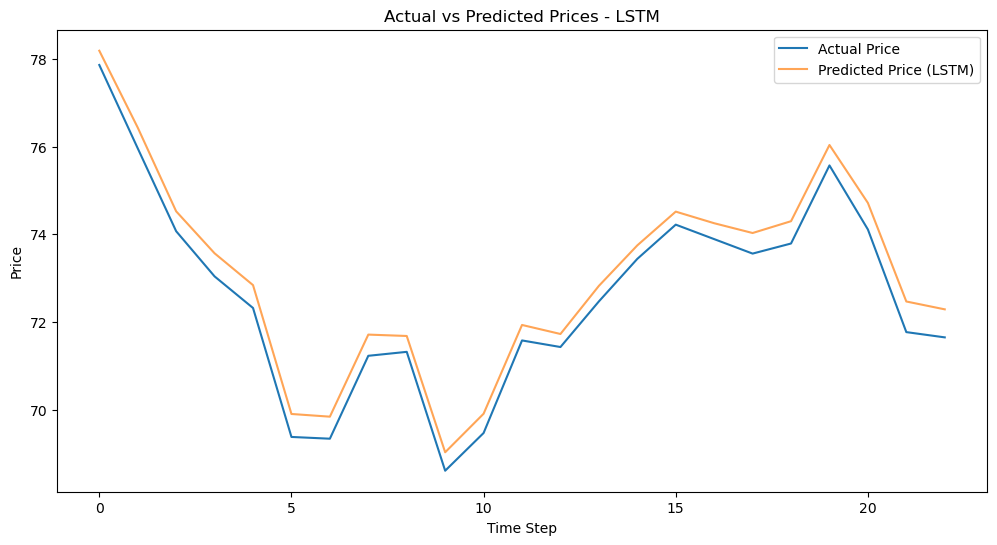

In [40]:
# Output metrics for LSTM
print("LSTM - Mean Squared Error:", lstm_mse)
print("LSTM - Root Mean Squared Error:", lstm_rmse)
print("LSTM - R^2 Score:", lstm_r2)

# Plot actual vs predicted for LSTM
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(lstm_predictions, label='Predicted Price (LSTM)', alpha=0.7)
plt.title('Actual vs Predicted Prices - LSTM')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
# Define the actual trend
actual_trend = ['Flat' if actual[i] == actual[i-1] else 'Up' if actual[i] > actual[i-1] else 'Down' for i in range(1, len(actual))]
actual_trend.insert(0, 'Flat')

# Define the trend for predicted prices
predicted_trend_lstm = ['Flat' if lstm_predictions[i] == lstm_predictions[i-1] else 'Up' if lstm_predictions[i] > lstm_predictions[i-1] else 'Down' for i in range(1, len(lstm_predictions))]
predicted_trend_lstm.insert(0, 'Flat')

# Create the DataFrame for price comparison
price_comparison_df_lstm = pd.DataFrame({
    'Actual Price': actual.flatten(),
    'Predicted Price': lstm_predictions.flatten(),
    'Actual Trend': actual_trend,
    'Predicted Trend': predicted_trend_lstm
})

# Calculate the accuracy of trend prediction
correct_trends_lstm = sum(1 for actual, predicted in zip(actual_trend, predicted_trend_lstm) if actual == predicted)
total_trends_lstm = len(actual_trend)
lstm_accuracy = correct_trends_lstm / total_trends_lstm

# Display the DataFrame
print(price_comparison_df_lstm)
print(f'Accuracy of correctly predicting the trend for LSTM: {lstm_accuracy:.2%}')

    Actual Price  Predicted Price Actual Trend Predicted Trend
0          77.86        78.185013         Flat            Flat
1          75.96        76.432503         Down            Down
2          74.07        74.523628         Down            Down
3          73.04        73.566536         Down            Down
4          72.32        72.841263         Down            Down
5          69.38        69.903671         Down            Down
6          69.34        69.842209         Down            Down
7          71.23        71.713249           Up              Up
8          71.32        71.681824           Up            Down
9          68.61        69.030746         Down            Down
10         69.47        69.909248           Up              Up
11         71.58        71.933151           Up              Up
12         71.43        71.727226         Down            Down
13         72.47        72.824158           Up              Up
14         73.44        73.747498           Up         

### COMPARISON

               Model       MSE      RMSE  R^2 Score  Training Time (s)  \
0  Linear Regression  0.134252  0.366404   0.972930           0.010609   
1      Random Forest  0.030077  0.173427   0.993935        1824.170488   
2  Gradient Boosting  0.105210  0.324362   0.978785        3431.143399   
3            XGBoost  0.130256  0.360909   0.973735          60.120689   
4               LSTM  0.215396  0.464108   0.956568         112.942565   

   Trend Accuracy  
0        0.913043  
1        0.869565  
2        0.869565  
3        0.826087  
4        0.956522  


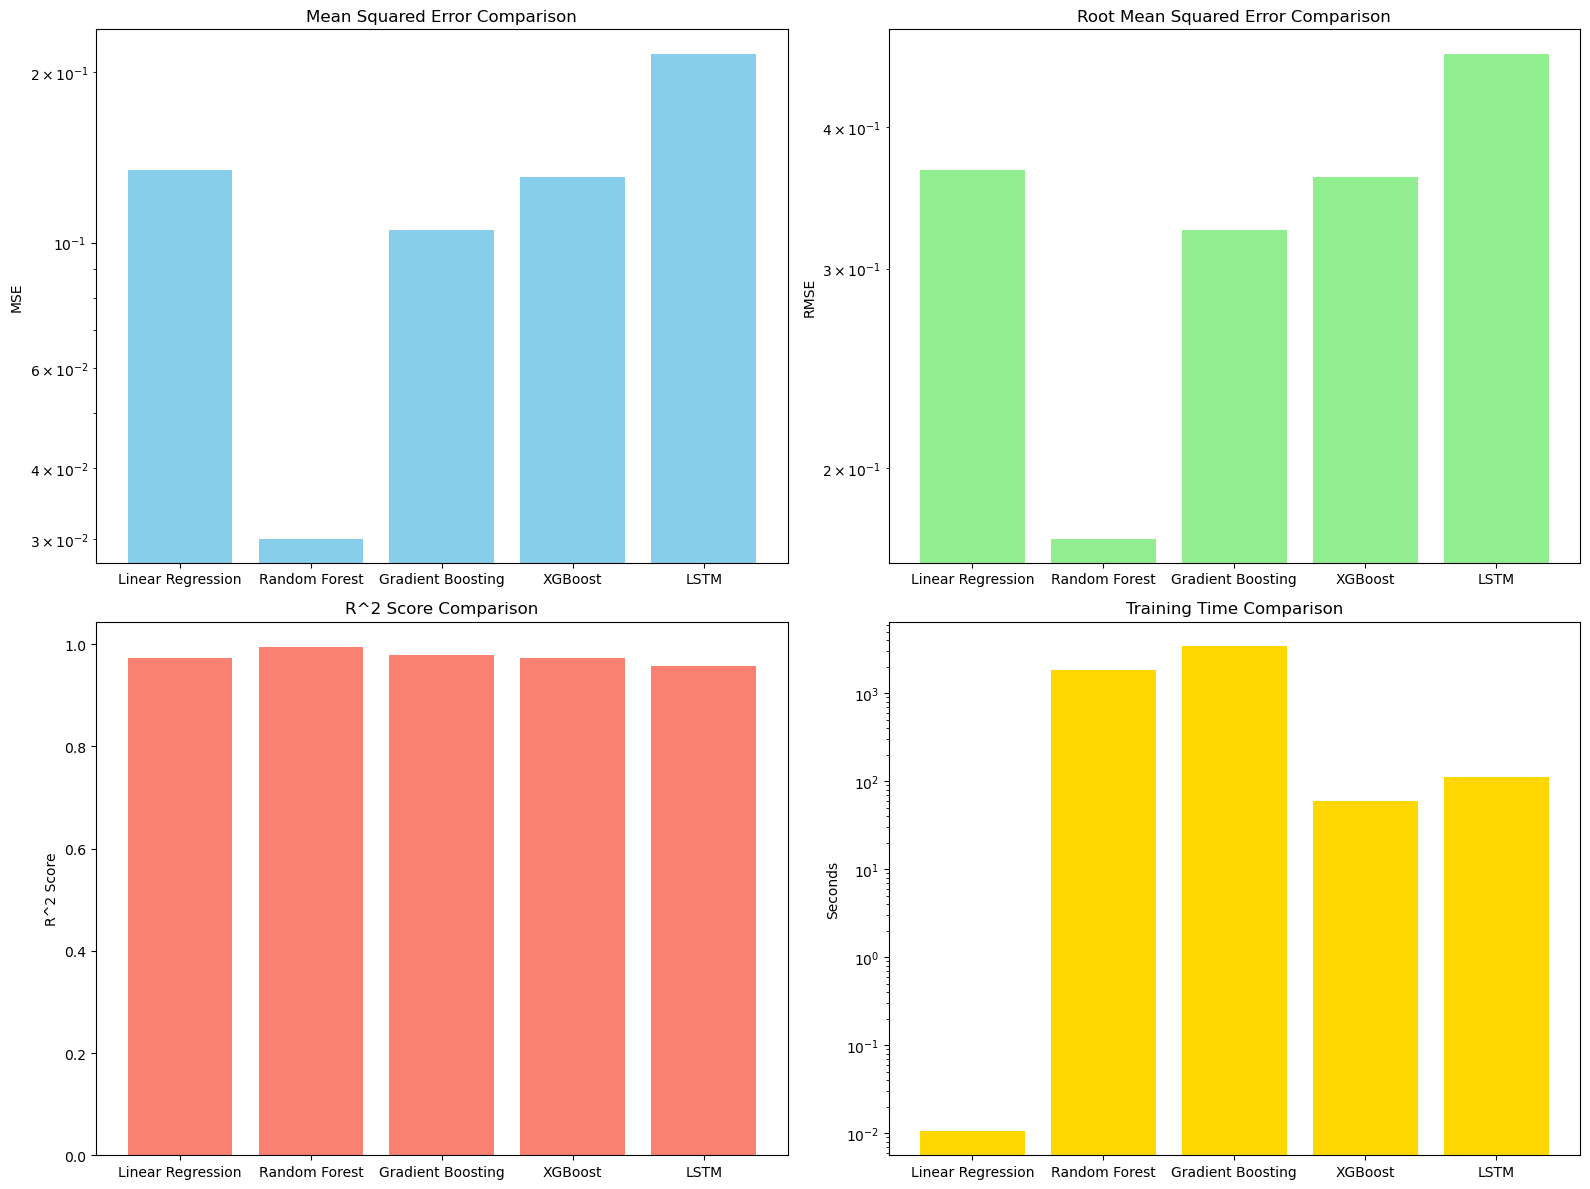

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Metrics summary data
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LSTM']
mse = [lr_mse, rf_mse, gb_mse, xgb_mse, lstm_mse]
rmse = [lr_rmse, rf_rmse, gb_rmse, xgb_rmse, lstm_rmse]
r2_scores = [lr_r2, rf_r2, gb_r2, xgb_r2, lstm_r2]
training_times = [training_time, rf_elapsed_time, gb_elapsed_time, xgb_elapsed_time, lstm_elapsed_time]
trend_accuracy = [lr_accuracy, rf_accuracy, gb_accuracy, xgb_accuracy, lstm_accuracy]

# Create a DataFrame to display the results neatly
results = pd.DataFrame({
    'Model': models,
    'MSE': mse,
    'RMSE': rmse,
    'R^2 Score': r2_scores,
    'Training Time (s)': training_times,
    'Trend Accuracy': trend_accuracy
})

# Display the results DataFrame
print(results)

# Plotting comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# MSE Comparison
axes[0].bar(models, mse, color='skyblue')
axes[0].set_title('Mean Squared Error Comparison')
axes[0].set_ylabel('MSE')
axes[0].set_yscale('log')

# RMSE Comparison
axes[1].bar(models, rmse, color='lightgreen')
axes[1].set_title('Root Mean Squared Error Comparison')
axes[1].set_ylabel('RMSE')
axes[1].set_yscale('log')

# R^2 Score Comparison
axes[2].bar(models, r2_scores, color='salmon')
axes[2].set_title('R^2 Score Comparison')
axes[2].set_ylabel('R^2 Score')

# Training Time Comparison
axes[3].bar(models, training_times, color='gold')
axes[3].set_title('Training Time Comparison')
axes[3].set_ylabel('Seconds')
axes[3].set_yscale('log')

plt.tight_layout()
plt.show()

### TRAINING PERIODS DIFF

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Setup date offsets for various training periods
last_date = data_cleaned.index.max()
start_last_month = last_date - pd.DateOffset(months=1)
offsets = {
    '10_years': pd.DateOffset(years=10),
    '5_years': pd.DateOffset(years=5),
    '1_year': pd.DateOffset(years=1),
    '6_months': pd.DateOffset(months=6),
    '3_months': pd.DateOffset(months=3)
}

# Calculate the start dates for each training period
start_dates = {key: last_date - offset for key, offset in offsets.items()}

# Initialize models
models = {
    'RandomForest': best_rf_model,
    'GradientBoosting': best_gb_model,
    'XGBoost': best_xgb_model,
    'LinearRegression': LinearRegression(),
    'LSTM': best_model
}

# Prepare data containers
train_data = {}
test_data = data_cleaned[data_cleaned.index >= start_last_month]

# Split data
for key, start_date in start_dates.items():
    train_data[key] = data_cleaned[(data_cleaned.index >= start_date) & (data_cleaned.index < start_last_month)]

# Dictionary to store results
results = {model_name: {} for model_name in models}

# Training and testing each model for each time period
for model_name, model in models.items():
    for key, data in train_data.items():
        X_train = data[features]
        y_train = data[target].values.ravel()
        X_test = test_data[features]
        y_test = test_data[target]

        if model_name == 'LSTM':
            # Reshape input data for LSTM (samples, time steps, features)
            X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
            X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

            model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)

            predictions = model.predict(X_test_lstm)
        else:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
        
        predictions = target_scaler.inverse_transform(predictions.reshape(-1, 1))
        actual = target_scaler.inverse_transform(y_test.values.reshape(-1, 1))

        mse = mean_squared_error(actual, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(actual, predictions)

        results[model_name][key] = {
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [44]:
rows = []

# Loop through the dictionary to populate the rows list
for model_name, periods in results.items():
    for period, metrics in periods.items():
        row = {
            'Model': model_name,
            'Period': period,
            'MSE': metrics['MSE'],
            'RMSE': metrics['RMSE'],
            'R2': metrics['R2']
        }
        rows.append(row)

# Create DataFrame
results_df = pd.DataFrame(rows)

# Setting multi-level index for better organization
results_df.set_index(['Model', 'Period'], inplace=True)

# Display the DataFrame
results_df


MSE          RMSE            R2
Model            Period                                            
RandomForest     10_years  7.281952e-02  2.698509e-01  9.853168e-01
                 5_years   1.491649e-01  3.862187e-01  9.699226e-01
                 1_year    5.671842e-01  7.531163e-01  8.856337e-01
                 6_months  6.284685e+00  2.506927e+00 -2.672359e-01
                 3_months  6.547136e+01  8.091438e+00 -1.220156e+01
GradientBoosting 10_years  2.455587e-01  4.955388e-01  9.504859e-01
                 5_years   2.577297e-01  5.076709e-01  9.480317e-01
                 1_year    6.146392e-01  7.839893e-01  8.760649e-01
                 6_months  4.320361e+00  2.078548e+00  1.288479e-01
                 3_months  9.254644e+01  9.620106e+00 -1.766095e+01
XGBoost          10_years  1.526854e-01  3.907498e-01  9.692127e-01
                 5_years   7.511881e-02  2.740781e-01  9.848531e-01
                 1_year    1.497058e-01  3.869183e-01  9.698135e-01
                 6_months  2.247500e+00  1.499166e+00  5.468171e-01
                 3_months  2.404776e+01  4.903851e+00 -3.848959e+00
LinearRegression 10_years  2.539240e-01  5.039088e-01  9.487991e-01
                 5_years   2.711855e-01  5.207547e-01  9.453185e-01
                 1_year    1.007057e-02  1.003522e-01  9.979694e-01
                 6_months  6.178678e-02  2.485695e-01  9.875414e-01
                 3_months  2.436330e+15  4.935920e+07 -4.912585e+14
LSTM             10_years  1.651818e-01  4.064256e-01  9.666930e-01
                 5_years   3.794718e-02  1.948004e-01  9.923484e-01
                 1_year    8.365632e-02  2.892340e-01  9.831316e-01
                 6_months  3.082413e-03  5.551949e-02  9.993785e-01
                 3_months  1.681489e-02  1.296723e-01  9.966095e-01

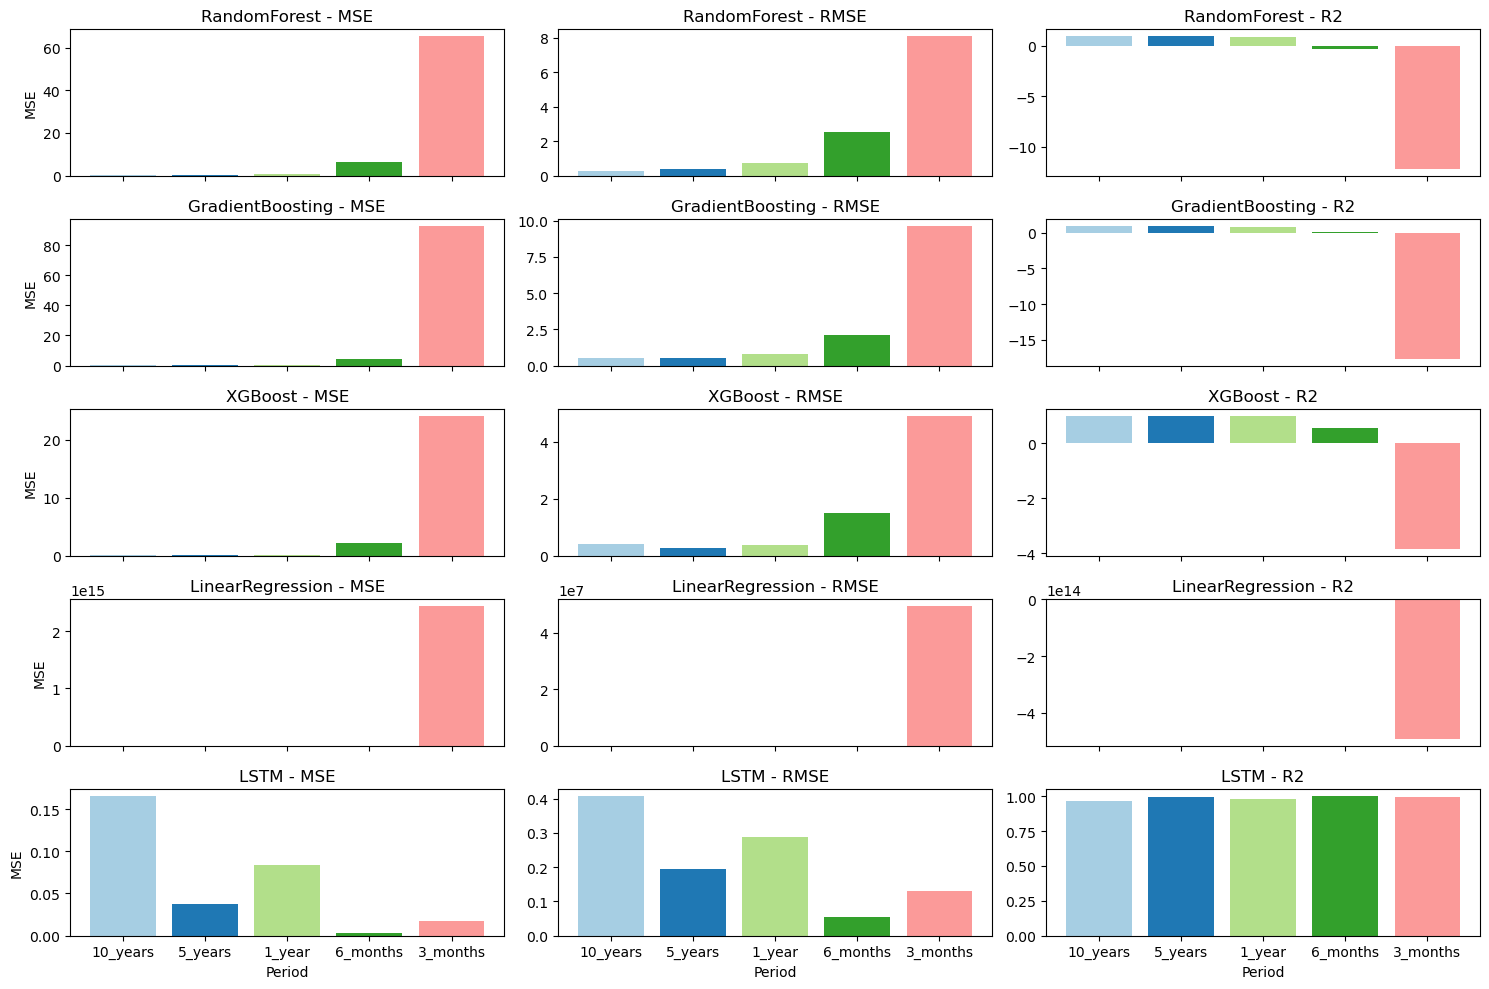

In [45]:
import matplotlib.pyplot as plt

# Setup plotting  
metrics = ['MSE', 'RMSE', 'R2']
fig, axes = plt.subplots(nrows=len(models), ncols=len(metrics), figsize=(15, 10), sharex=True)

for row_idx, model in enumerate(models):
    for col_idx, metric in enumerate(metrics):
        ax = axes[row_idx][col_idx]
        periods = list(start_dates.keys())
        values = [results[model][period][metric] for period in periods]
        
        ax.bar(periods, values, color=plt.cm.Paired(np.arange(len(values))))
        ax.set_title(f'{model} - {metric}')
        if row_idx == len(models) - 1:
            ax.set_xlabel('Period')
        if col_idx == 0:
            ax.set_ylabel(metric)

plt.tight_layout()
plt.show()
